### Import Libraries

In [63]:
import pandas as pd
import numpy as np
import re 
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

In [64]:
dataset_path = 'data/sentiment_analysis.csv'
df = pd.read_csv(dataset_path, index_col='id')
df

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...
...,...,...
7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7917,0,We would like to wish you an amazing day! Make...
7918,0,Helping my lovely 90 year old neighbor with he...


In [65]:
df.describe()

,label
count,7920.000000
mean,0.255808
std,0.436342
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7920 entries, 1 to 7920
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   7920 non-null   int64 
 1   tweet   7920 non-null   object
dtypes: int64(1), object(1)
memory usage: 185.6+ KB


### Preprocessing

In [67]:
def text_normalize(text):
    # Retweet old acronum "RT" removal
    text = re.sub(r'^RT[\s]+', '', text)

    # Hyperlinks removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

    # Hashtags removal
    text = re.sub(r'#', '', text)

    # Punctuation removal
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    return tokenizer.tokenize(text)

In [68]:
def get_freqs(df):
    freqs = defaultdict(lambda: 0)
    for idx, row in df.iterrows():
        tweet = row['tweet']
        label = row['label']

        tokens = text_normalize(tweet)
        for token in tokens:
            pair = (token, label)
            freqs[pair] += 1
    return freqs

freqs = get_freqs(df)
freqs

defaultdict(<function __main__.get_freqs.<locals>.<lambda>()>,
            {('fingerprint', 0): 4,
             ('pregnancy', 0): 1,
             ('test', 0): 8,
             ('finally', 0): 168,
             ('a', 0): 727,
             ('transparant', 0): 1,
             ('silicon', 0): 1,
             ('case', 0): 228,
             ('thanks', 0): 94,
             ('to', 0): 876,
             ('my', 0): 1227,
             ('uncle', 0): 4,
             ('yay', 0): 63,
             ('sony', 0): 701,
             ('xperia', 0): 54,
             ('s', 0): 38,
             ('sonyexperias', 0): 1,
             ('we', 0): 159,
             ('love', 0): 385,
             ('this', 0): 456,
             ('would', 0): 95,
             ('you', 0): 557,
             ('go', 0): 67,
             ('talk', 0): 12,
             ('makememories', 0): 1,
             ('unplug', 0): 2,
             ('relax', 0): 31,
             ('iphone', 0): 2905,
             ('smartphone', 0): 61,
             ('wifi',

In [69]:
def get_feature(text, freqs):
    tokens = text_normalize(text)
    
    X = np.zeros(3)
    X[0] = 1
    for token in tokens:
        X[1] += freqs[(token, 1)]
        X[2] += freqs[(token, 0)]
    return X

In [70]:
X = []
y = []

freqs = get_freqs(df)
for idx, row in df.iterrows():
    tweet = row['tweet']
    label = row['label']

    X.append(get_feature(tweet, freqs))
    y.append(label)

X = np.array(X)
y = np.array(y)
print(X)
print(X.shape)
print(y)
print(y.shape)

[[1.000e+00 2.000e+00 1.300e+01]
 [1.000e+00 2.788e+03 4.183e+03]
 [1.000e+00 1.425e+03 4.768e+03]
 ...
 [1.000e+00 4.635e+03 6.175e+03]
 [1.000e+00 1.959e+03 3.814e+03]
 [1.000e+00 3.181e+03 6.160e+03]]
(7920, 3)
[0 0 0 ... 0 0 0]
(7920,)


### Split

In [71]:
val_size, test_size = 0.2, 0.125
random_state = 2
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=random_state, shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(5544, 3) (5544,)
(1584, 3) (1584,)
(792, 3) (792,)


In [72]:
X

array([[1.000e+00, 2.000e+00, 1.300e+01],
       [1.000e+00, 2.788e+03, 4.183e+03],
       [1.000e+00, 1.425e+03, 4.768e+03],
       ...,
       [1.000e+00, 4.635e+03, 6.175e+03],
       [1.000e+00, 1.959e+03, 3.814e+03],
       [1.000e+00, 3.181e+03, 6.160e+03]])

In [73]:
scaler = StandardScaler()
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_val[:, 1:] = scaler.transform(X_val[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

In [74]:
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(random_state)

In [75]:
from train_logistic_regression import train
from logistic_regression_funcs import *

theta, train_acc, train_losses, val_acc, val_losses = train(X_train, y_train, X_val, y_val, lr, epochs, batch_size)

Epoch 1/200, train_loss: 0.772, train_acc: 0.470, val_loss: 0.768, val_acc: 0.467
Epoch 2/200, train_loss: 0.724, train_acc: 0.546, val_loss: 0.720, val_acc: 0.548
Epoch 3/200, train_loss: 0.684, train_acc: 0.605, val_loss: 0.681, val_acc: 0.610
Epoch 4/200, train_loss: 0.651, train_acc: 0.650, val_loss: 0.648, val_acc: 0.657
Epoch 5/200, train_loss: 0.624, train_acc: 0.676, val_loss: 0.620, val_acc: 0.682
Epoch 6/200, train_loss: 0.601, train_acc: 0.698, val_loss: 0.597, val_acc: 0.697
Epoch 7/200, train_loss: 0.581, train_acc: 0.714, val_loss: 0.578, val_acc: 0.716
Epoch 8/200, train_loss: 0.565, train_acc: 0.730, val_loss: 0.561, val_acc: 0.736
Epoch 9/200, train_loss: 0.551, train_acc: 0.743, val_loss: 0.547, val_acc: 0.750
Epoch 10/200, train_loss: 0.539, train_acc: 0.757, val_loss: 0.535, val_acc: 0.763
Epoch 11/200, train_loss: 0.528, train_acc: 0.770, val_loss: 0.525, val_acc: 0.777
Epoch 12/200, train_loss: 0.519, train_acc: 0.775, val_loss: 0.515, val_acc: 0.782
Epoch 13/200,

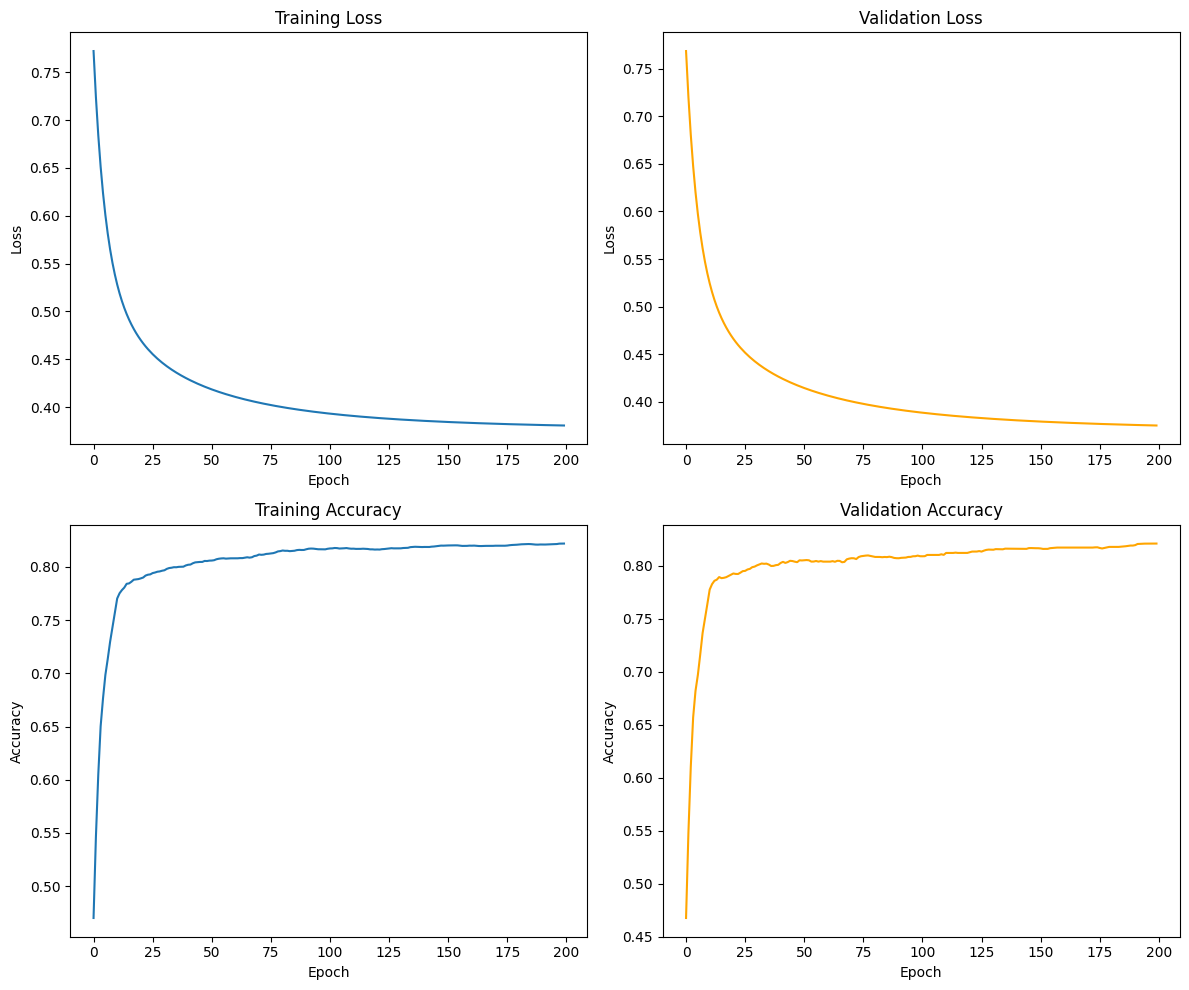

In [76]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_acc)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_acc, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.tight_layout()
plt.show()

In [77]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'val_acc: {val_set_acc:.3f}')
print(f'test_acc: {test_set_acc:.3f}')

Evaluation on validation and test set:
val_acc: 0.821
test_acc: 0.840
